<a href="https://colab.research.google.com/github/TANYA-CHAN/NLP_SummerProject_Drafts/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1(Attachments: TextPreprocessing, News.zip)


In [ ]:
import numpy as np
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
upload = files.upload()
!unzip News.zip
f = [open(r"News/"+i, encoding = 'utf-8') for i in os.listdir(r"News/")]
documents = []

Saving News.zip to News.zip
Archive:  News.zip
   creating: News/
  inflating: News/1.txt              
  inflating: News/10.txt             
  inflating: News/100.txt            
  inflating: News/1000.txt           
  inflating: News/1001.txt           
  inflating: News/1002.txt           
  inflating: News/1003.txt           
  inflating: News/1004.txt           
  inflating: News/1005.txt           
  inflating: News/1006.txt           
  inflating: News/1007.txt           
  inflating: News/1008.txt           
  inflating: News/1009.txt           
  inflating: News/101.txt            
  inflating: News/1010.txt           
  inflating: News/1011.txt           
  inflating: News/1012.txt           
  inflating: News/1013.txt           
  inflating: News/1014.txt           
  inflating: News/1015.txt           
  inflating: News/1016.txt           
  inflating: News/1017.txt           
  inflating: News/1018.txt           
  inflating: News/1019.txt           
  inflating: News/102.

In [ ]:
for i in range(len(f)):
  try:
    documents.append(f[i].read())
  except:
    print("Extraction of", f[i], "failed")

In [ ]:
from TextPreprocessing import clean

In [ ]:
X = list(map(clean,documents))
vectorizer = TfidfVectorizer(smooth_idf=True)
X1 = vectorizer.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters = km.labels_.tolist()
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X1, n_components=10, n_iter=100,random_state=122)

In [ ]:
import umap



In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

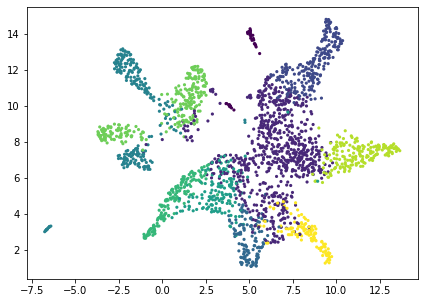

In [ ]:
X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = clusters, s = 10, edgecolor='none')
plt.show()


In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD
import pandas as pd

In [ ]:
def LSA(k, X):
  X_clean = list(map(clean,X))
  vectorizer = TfidfVectorizer(smooth_idf=True)
  X_transformed = vectorizer.fit_transform(X_clean)
  svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=300,
  random_state=122)
  lsa = svd.fit_transform(X_transformed)
  column_names = ["Topic {}".format(str(i+1)) for i in range(k)]
  document_topic_matrix = pd.DataFrame(lsa,columns=column_names,index=X)
  dic = vectorizer.get_feature_names()
  term_topic_matrix = pd.DataFrame(svd.components_, index = column_names,
  columns = (dic)).T
  return document_topic_matrix, term_topic_matrix 

In [ ]:
LSA(6,X)

(                                                     Topic 1  ...   Topic 6
 lufthansa flies back profit german airline luft...  0.099914  ...  0.018844
 nadal marches mexico rafael nadal continued run...  0.055391  ... -0.001766
 brando rejected godfather role late film star m...  0.100136  ...  0.010243
 ailing eurodisney vows turnaround eurodisney eu...  0.101955  ...  0.035387
 bafta hand movie honours movie stars across glo...  0.161484  ...  0.001049
 ...                                                      ...  ...       ...
 us rule yukos refuge call yukos said us bankrup...  0.196752  ...  0.503204
 abbas tolerate attacks palestinian leader mahmo...  0.163252  ...  0.041870
 year remember irish used one subliminal moment ...  0.185992  ... -0.056112
 real finish abandoned match real madrid real so...  0.155267  ... -0.008958
 veteran comic cyril fletcher dies veteran comed...  0.122809  ... -0.001332
 
 [2224 rows x 6 columns],
               Topic 1   Topic 2   Topic 3   Top

Q2(Attachments:News.zip)

In [ ]:
import numpy as np
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import os.path
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import files
upload = files.upload()
!unzip News.zip
f = [open(r"News/"+i, encoding = 'utf-8') for i in os.listdir(r"News/")]
documents = []

Saving News.zip to News (1).zip
Archive:  News.zip
replace News/1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace News/1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: News/1.txt              
  inflating: News/10.txt             
  inflating: News/100.txt            
  inflating: News/1000.txt           
  inflating: News/1001.txt           
  inflating: News/1002.txt           
  inflating: News/1003.txt           
  inflating: News/1004.txt           
  inflating: News/1005.txt           
  inflating: News/1006.txt           
  inflating: News/1007.txt           
  inflating: News/1008.txt           
  inflating: News/1009.txt           
  inflating: News/101.txt            
  inflating: News/1010.txt           
  inflating: News/1011.txt           
  inflating: News/1012.txt           
  inflating: News/1013.txt           
  inflating: News/1014.txt           
  inflating: News/1015.txt           
  inflating: News/1016.txt           
  

In [ ]:
for i in range(len(f)):
  try:
    documents.append(f[i].read())
  except:
    print("Extraction of", f[i], "failed")

In [ ]:
from TextPreprocessing import clean

In [ ]:
X = list(map(clean,documents))
vectorizer = TfidfVectorizer(smooth_idf=True)
X1 = vectorizer.fit_transform(X)

In [ ]:
def LSA(k, X):
 X_clean = list(map(clean,X))
 vectorizer = TfidfVectorizer(smooth_idf=True, max_features=1000)
 X_transformed = vectorizer.fit_transform(X_clean)
 feature_count = len(vectorizer.get_feature_names())
 if k>feature_count:
  k = feature_count-1
 svd = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=300,random_state=122)
 lsa = svd.fit_transform(X_transformed)
 Sigma = svd.singular_values_
 column_names = ["Topic {}".format(str(i+1)) for i in range(lsa.shape[1])]
 document_topic_matrix = pd.DataFrame(lsa,columns=column_names)
 document_topic_matrix["Document"] = X
 document_topic_matrix["Position"] = [i for i in range(len(X))]
 dic = vectorizer.get_feature_names()
 term_topic_matrix = pd.DataFrame(svd.components_, index = column_names,  columns = (dic)).T
 return k,Sigma, lsa, document_topic_matrix, term_topic_matrix 

In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD
import pandas as pd

In [ ]:
k,Sigma, lsa, document_topic_matrix, term_topic_matrix =LSA(6,X)

In [ ]:
def percent_sigma(Sigma, X):
 agg = sum(Sigma)
 return (Sigma/agg)*len(X)

In [ ]:
percent_sigma(Sigma, X)

array([662.41348437, 368.12547163, 332.84138435, 319.17967086,
       297.5361307 , 243.90385809])

In [ ]:
def summarize(k,sigma, document_term):
 summary = []
 sigma*= len(sigma)
 sigma = sigma.astype(int)
 column_names = ["Topic {}".format(str(i+1)) for i in range(k)]
 for i in range(len(column_names)):
  num_sent = sigma[i]
  topic = column_names[i]
  document_term.sort_values(by = topic,inplace=True)
  document_term.reset_index(inplace=True)
  document_term.drop(columns = ["index"],inplace=True)
  for j in range(num_sent):
    if document_term["Document"][j] not in summary:

      summary.append((document_term["Document"][j],document_term["Position"][j]))
      summary.sort(key = lambda x: x[1])
      sent = [i[0] for i in summary]
      return " ".join(sent) 

In [ ]:
import pandas as pd
!pip install pandas==0.23.4

In [ ]:
summarize(k,Sigma, X)

Q3 (Attachments:BuzzWords.txt)

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
import nltk
nltk.download("punkt")
nltk.download('stopwords')
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from TextPreprocessing import clean


In [ ]:
def load_data(path,file_name):
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [ ]:
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  
  print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
  return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
  coherence_values = []
  model_list = []
  for num_topics in range(start, stop, step):
    model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
  return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
document_list,titles=load_data("","BuzzWords.txt")
document_list
clean_text=clean(document_list)

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [ ]:

number_of_topics=7
words=10
model=create_gensim_lsa_model(clean_text,number_of_topics,words)